In [55]:
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import optuna
import re 

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import mutual_info_classif
 
from xgboost import XGBClassifier
from xgboost import plot_importance as plot_importance_xgboost

from lightgbm import LGBMClassifier
from lightgbm import plot_importance as plot_importance_lightgbm

from catboost import CatBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier  

from sklearn.metrics import f1_score

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# # Сброс ограничений на количество выводимых рядов
# pd.set_option('display.max_rows',None)

RANDOM_SEED=1224

In [56]:
def info(data, name):
    ''' Input: data = имя файла
               name = название файла 
        Output: none
        Description: Функция выводит на экран общую информацию файла,
        количесво дубликатов в файле, количесво пропусков в файле
    '''
    start = '\033[1m'
    end = '\033[0;0m'
    print(start + 'Общая информация', name + end)
    print(data.info())
    print(start + name + end)
    display(data)
    print(start + 'Cтатистические данные', name + end)
    display(data.describe())
    display(data.describe(include=['O']))
    print(start + 'Количесво дубликатов', name + end)
    print(data.duplicated().sum())
    print(start + 'Количесво пропусков', name + end)
    display(data.isna().sum())

In [57]:
def read(pth1, pth2, name):
    ''' Input: pth1 = место файла 1
               pth2 = место файла 2
               name = название файла
        Output: прочитаный файл csv
        Description: Функция читает файлы csv из указанного места и вызывает в себе функцию info которая: выводит на экран 
                    общую информацию файла, первые пять строк файла, статистические данные файла, количесво дубликатов в файле, 
                    количесво пропусков в файле
    '''
    if os.path.exists(pth1):
        data = pd.read_csv(pth1)
        info(data, name)
    elif os.path.exists(pth2):
        data = pd.read_csv(pth2)
        info(data, name)
    else:
        print('File Not Found Error')
    return data

In [58]:
train = read(r'C:\Users\User\Desktop\DS\hak\train_dataset_train.csv',
            '', 
            'Тренировочные')

Общая информация Тренировочные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_О

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,0.0,Россия,Алтайский край,Барнаул г,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,0.0,Россия,Алтайский край,Алтайское с,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4
3,81661,19838,2017,Жен,БН,Английский язык,1994-12-08 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,0.0,Россия,Алтайский край,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,35.0,74.000,4
4,81509,19803,2017,Жен,БН,Английский язык,1995-06-28 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,0.0,Россия,Алтайский край,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,53.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13579,74283,17593,2016,Муж,ОО,Английский язык,1998-09-17 00:00:00.000,МБОУ СОШ №98,"Россия, Алтайский край, г Барнаул",2016.0,0.0,Россия,Алтайский край,Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,34.0,59.000,3
13580,71516,19433,2015,Жен,ОО,Немецкий язык,1997-09-19 00:00:00.000,"МКОУ ""Георгиевская СОШ""","Алтайский край, Ребрихинский р-н, Георгиевка с",2015.0,0.0,Россия,Алтайский край,г. Барнаул,1.0,0,0.0,Россия,0.0,0.0,0.0,26.0,82.000,4
13581,76970,18723,2016,Муж,СН,Английский язык,1998-03-20 00:00:00.000,МБОУ СОШ №113 им. Сергея Семенова,"Россия, Алтайский край, г Барнаул",2016.0,0.0,Россия,Алтайский край,Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,3.400,4
13582,48548,14663,2012,Жен,ОО,NaN,1995-07-06 00:00:00.000,NaN,NaN,NaN,0.0,Россия,NaN,NaN,0.0,1,1.0,Россия,0.0,0.0,0.0,24.0,95.000,4


Cтатистические данные Тренировочные


,ID,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
count,13584.000000,13584.000000,13584.000000,12284.000000,12576.0,13498.000000,13584.000000,13584.000000,13584.000000,13498.000000,13274.000000,13584.000000,13584.000000,13584.000000
mean,70096.056905,18302.499926,2014.992123,2013.876018,0.0,0.219884,0.511484,0.509570,0.000442,0.229441,0.070589,32.500368,73.223274,3.426458
std,12705.894531,2540.417956,2.595339,4.247111,0.0,0.414184,0.499886,0.499927,0.021013,0.420489,0.256147,8.458150,258.045027,1.071765
min,44632.000000,11550.000000,2001.000000,1973.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,-1.000000
25%,63496.750000,16901.000000,2013.000000,2013.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,47.000000,3.000000
50%,71401.500000,18534.500000,2015.000000,2015.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,61.000000,4.000000
75%,78404.250000,20599.000000,2016.000000,2016.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,75.000000,4.000000
max,264403.000000,22824.000000,2212.000000,2020.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.000000,5000.000000,4.000000


,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Страна_ПП,Регион_ПП,Город_ПП,Страна_Родители
count,13577,13584,12758,13584,12351,12203,13237,12966,13141,13126
unique,3,5,7,5044,3646,2110,23,192,1765,19
top,Жен,ОО,Английский язык,1995-08-07 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, Барнаул г",Россия,Алтайский край,Барнаул г,Россия
freq,8133,5084,10450,16,1359,2413,12435,11492,3735,12239


Количесво дубликатов Тренировочные
0
Количесво пропусков Тренировочные


ID                     0
Код_группы             0
Год_Поступления        0
Пол                    7
Основания              0
Изучаемый_Язык       826
Дата_Рождения          0
Уч_Заведение        1233
Где_Находится_УЗ    1381
Год_Окончания_УЗ    1300
Пособие             1008
Страна_ПП            347
Регион_ПП            618
Город_ПП             443
Общежитие             86
Наличие_Матери         0
Наличие_Отца           0
Страна_Родители      458
Опекунство             0
Село                  86
Иностранец           310
КодФакультета          0
СрБаллАттестата        0
Статус                 0
dtype: int64

In [59]:
test = read(r'C:\Users\User\Desktop\DS\hak\test_dataset_test.csv',
            '', 
            'Тестовые')

Общая информация Тестовые
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6691 entries, 0 to 6690
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6691 non-null   int64  
 1   Код_группы        6691 non-null   int64  
 2   Год_Поступления   6691 non-null   int64  
 3   Пол               6688 non-null   object 
 4   Основания         6691 non-null   object 
 5   Изучаемый_Язык    6295 non-null   object 
 6   Дата_Рождения     6691 non-null   object 
 7   Уч_Заведение      6113 non-null   object 
 8   Где_Находится_УЗ  6031 non-null   object 
 9   Год_Окончания_УЗ  6074 non-null   float64
 10  Пособие           6207 non-null   float64
 11  Страна_ПП         6531 non-null   object 
 12  Регион_ПП         6401 non-null   object 
 13  Город_ПП          6477 non-null   object 
 14  Общежитие         6656 non-null   float64
 15  Наличие_Матери    6691 non-null   int64  
 16  Наличие_Отца    

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
0,64996,20608,2014,Жен,ДН,Английский язык,1995-11-03 00:00:00.000,"МБОУ ""СОШ №55""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,40.0,49.0
1,71837,20613,2015,Жен,ДН,Немецкий язык,1995-12-10 00:00:00.000,"МБОУ ""СОШ №1""","Алтайский край, Рубцовск г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,1.0,0.0,26.0,77.0
2,86587,21210,2018,Жен,ОО,Английский язык,1973-08-09 00:00:00.000,Алтайский государственный медицинский университет,"Алтайский край, г. Барнаул",1997.0,0.0,Россия,Алтайский край,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,34.0,74.0
3,73673,22254,2015,Жен,ОО,Английский язык,1983-12-07 00:00:00.000,"ГОУ ВПО ""Алтайский государственный университет""","Алтайский край, Барнаул г",2006.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,53.0,57.0
4,54709,15040,2012,Жен,ОО,NaN,1994-05-21 00:00:00.000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6686,74342,20680,2016,Муж,БН,Английский язык,1992-03-06 00:00:00.000,ГУ Павлодарский профессиональный лицей №7,"Казахстан, Павлодарская обл, г Павлодар",2011.0,0.0,Казахстан,Павлодарская обл,Павлодар,1.0,1,1.0,Казахстан,0.0,0.0,1.0,34.0,77.0
6687,54876,16921,2013,Жен,ОО,NaN,1995-11-08 00:00:00.000,NaN,NaN,NaN,0.0,Россия,Алтай Респ,Чемал,0.0,1,1.0,Россия,0.0,0.0,0.0,36.0,62.0
6688,66879,19400,2014,Жен,СН,Английский язык,1996-03-31 00:00:00.000,"МБОУ ""Гимназия №42""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,26.0,52.0
6689,64982,18152,2014,Муж,ОО,Немецкий язык,1996-08-22 00:00:00.000,"МБОУ ""Ребрихинская СОШ""","Алтайский край, Ребрихинский р-н, Ребриха ст",2014.0,0.0,Россия,Алтайский край,Ребриха с,1.0,0,0.0,Россия,0.0,1.0,0.0,27.0,69.0


Cтатистические данные Тестовые


,ID,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата
count,6691.000000,6691.000000,6691.000000,6074.000000,6207.0,6656.000000,6691.000000,6691.000000,6691.000000,6654.000000,6561.000000,6691.000000,6691.000000
mean,70202.034225,18310.805111,2014.991929,2013.800955,0.0,0.223407,0.501270,0.500673,0.000897,0.223024,0.071026,32.560155,71.681369
std,12763.462061,2523.533176,1.950492,4.450884,0.0,0.416560,0.500036,0.500037,0.029934,0.416305,0.256887,8.514496,250.386989
min,44602.000000,11574.000000,2006.000000,1966.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000
25%,64919.500000,16891.500000,2013.000000,2013.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,47.000000
50%,71380.000000,18537.000000,2015.000000,2015.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,61.000000
75%,78370.500000,20601.000000,2016.000000,2016.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,76.000000
max,194044.000000,22753.000000,2020.000000,2020.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.000000,7232.000000


,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Страна_ПП,Регион_ПП,Город_ПП,Страна_Родители
count,6688,6691,6295,6691,6113,6031,6531,6401,6477,6493
unique,3,6,7,3590,2244,1260,19,133,1094,15
top,Жен,ОО,Английский язык,1996-07-09 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, Барнаул г",Россия,Алтайский край,Барнаул г,Россия
freq,3974,2565,5202,11,624,1237,6127,5722,1872,6073


Количесво дубликатов Тестовые
0
Количесво пропусков Тестовые


ID                    0
Код_группы            0
Год_Поступления       0
Пол                   3
Основания             0
Изучаемый_Язык      396
Дата_Рождения         0
Уч_Заведение        578
Где_Находится_УЗ    660
Год_Окончания_УЗ    617
Пособие             484
Страна_ПП           160
Регион_ПП           290
Город_ПП            214
Общежитие            35
Наличие_Матери        0
Наличие_Отца          0
Страна_Родители     198
Опекунство            0
Село                 37
Иностранец          130
КодФакультета         0
СрБаллАттестата       0
dtype: int64

Создадим две функции для очистки текста, которые удалят слова из 1 буквы и оставят только русские буквы и цифры без символов

In [60]:
def clean_shortwords(data):
    words = data.split() 
    clean_words = [word for word in words if len(word) > 1]
    return " ".join(clean_words)

def clear_text(text):
    return " ".join(re.sub(r'[^а-яА-ЯёЁ0123456789 ]', '', text).split())

In [61]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

Объеденим файлы в один для обработки

In [62]:
full = pd.concat([train,test])

Измерим тип данных у столбца дата рождения

In [63]:
full['Дата_Рождения'] = pd.to_datetime(full['Дата_Рождения'])

Выделим год, месяц и день рождения

In [64]:
full['Дата_Рождения_Год'] = full['Дата_Рождения'].dt.year
full['Дата_Рождения_Месяц'] = full['Дата_Рождения'].dt.month
full['Дата_Рождения_День'] = full['Дата_Рождения'].dt.day

**Обработка категориальных столбцов**

In [65]:
full['Пол'] = full['Пол'].str.lower()

In [66]:
full['Изучаемый_Язык'] = full['Изучаемый_Язык'].str.lower()

In [67]:
full['Изучаемый_Язык'].unique()

array(['английский язык', nan, 'немецкий язык', 'французский язык',
       'русский язык', 'иностранный язык (английский)',
       'иностранный язык (немецкий)', 'англиийский',
       'английский, немецкий языки'], dtype=object)

In [68]:
full.loc[full['Изучаемый_Язык'] == 'иностранный язык (английский)', 'Изучаемый_Язык'] = 'английский'

In [69]:
full.loc[full['Изучаемый_Язык'] == 'англиийский', 'Изучаемый_Язык'] = 'английский'

In [70]:
full.loc[full['Изучаемый_Язык'] == 'иностранный язык (немецкий)', 'Изучаемый_Язык'] = 'немецкий'

In [71]:
words = [' языки', ' язык']
pat = '|'.join(words)
full['Изучаемый_Язык'] = full['Изучаемый_Язык'].replace(pat,'', regex=True)

In [72]:
full['Уч_Заведение'] = full['Уч_Заведение'].fillna('неизвестно')
full['Уч_Заведение'] = full['Уч_Заведение'].str.lower()

In [73]:
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].fillna('неизвестно')
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].str.lower()

In [74]:
full['Страна_ПП'] = full['Страна_ПП'].fillna('неизвестно')
full['Страна_ПП'] = full['Страна_ПП'].str.lower()

In [75]:
full['Регион_ПП'] = full['Регион_ПП'].fillna('неизвестно')
full['Регион_ПП'] = full['Регион_ПП'].str.lower()

In [76]:
full['Город_ПП'] = full['Город_ПП'].fillna('неизвестно')
full['Город_ПП'] = full['Город_ПП'].str.lower()

In [77]:
full['Страна_Родители'] = full['Страна_Родители'].fillna('неизвестно')
full['Страна_Родители'] = full['Страна_Родители'].str.lower()

Удалим и исправим ошибки 

In [78]:
words = [' республика', 'республика ', ' респ', ' вко']
pat = '|'.join(words)
full['Страна_ПП'] = full['Страна_ПП'].replace(pat,'', regex=True)

full['Страна_ПП'] = full['Страна_ПП'].replace('росссия','россия', regex=True)

words = ['кыргызия', 'кыргызская', 'кыргызстан']
pat = '|'.join(words)
full['Страна_ПП'] = full['Страна_ПП'].replace(pat,'киргизия', regex=True)

In [79]:
sorted(full['Страна_ПП'].unique())

['армения',
 'афганистан',
 'казахстан',
 'киргизия',
 'китай',
 'монголия',
 'неизвестно',
 'нигерия',
 'россия',
 'таджикистан',
 'туркменистан',
 'узбекистан',
 'украина',
 'франция']

In [80]:
words = [' республика', 'республика ', ' респ', ' вко']
pat = '|'.join(words)
full['Страна_Родители'] = full['Страна_Родители'].replace(pat,'', regex=True)

full['Страна_Родители'] = full['Страна_Родители'].replace('росссия','россия', regex=True)

words = ['кыргызия', 'кыргызская', 'кыргызстан']
pat = '|'.join(words)
full['Страна_Родители'] = full['Страна_Родители'].replace(pat,'киргизия', regex=True)

full['Страна_Родители'] = full['Страна_Родители'].replace('кнр','китай', regex=True)
full['Страна_Родители'] = full['Страна_Родители'].replace('чеченская','россия', regex=True)


In [81]:
full['Город_ПП'] =full['Город_ПП'].apply(clean_shortwords)
full['Город_ПП'] =full['Город_ПП'].apply(clear_text)
full['Город_ПП'] =full['Город_ПП'].apply(clean_shortwords)

In [82]:
words = ['пос ', ' ул', ' дер', ' пос', 'село ', 'уезд ', ' ст', 'ст ', ' гор', ' рп', ' пр', ' пгт', 'рп ', 'рн ', ' уезд']
pat = '|'.join(words)
full['Город_ПП'] = full['Город_ПП'].replace(pat,'', regex=True)

full['Город_ПП'] = full['Город_ПП'].replace('ё','е', regex=True)
full.loc[full['Город_ПП'] == '', 'Город_ПП'] = 'неизвестно'

In [83]:
sorted(full['Город_ПП'].unique(), 
#        reverse=True
      )

['10 лет октября',
 '12 лет октября',
 '19 километр дачный массив',
 'абай',
 'абакан',
 'азино',
 'аил ташбулак ынтымак',
 'айхал',
 'акдовурак',
 'акимовка',
 'аксу',
 'акташ',
 'актерек',
 'актобе',
 'акулово',
 'алдан',
 'алейск',
 'алейский',
 'александровка',
 'александровский',
 'алексеевка',
 'аллак',
 'алматы',
 'алмоси',
 'алтай',
 'алтайское',
 'алтйское',
 'алханкала',
 'амур',
 'анадырь',
 'ананьевка',
 'ангарск',
 'андреевка',
 'андроново',
 'анжеросудженск',
 'анисимово',
 'антипино',
 'антоньевка',
 'ануйское',
 'аньцин',
 'аньян',
 'араван',
 'арашан',
 'арбузовка',
 'армавир',
 'артемовский',
 'артыбаш',
 'ас',
 'аскиз',
 'астана',
 'асямовка',
 'ауэзова',
 'ахмет',
 'ачинск',
 'ашанбаева',
 'аюла',
 'ая',
 'баган',
 'баево',
 'бажево',
 'байхаак',
 'балакино',
 'балбай',
 'балыктуюль',
 'балыкча',
 'банаул',
 'барагаш',
 'барановка',
 'баранул',
 'бареаул',
 'барнааул',
 'барнаул',
 'барнаул 184 58',
 'барнаул авиатор',
 'барнаул бельмесево',
 'барнаул борзовая заимк

In [84]:
full['Регион_ПП'] = full['Регион_ПП'].apply(clean_shortwords)
full['Регион_ПП'] = full['Регион_ПП'].apply(clear_text)
full['Регион_ПП'] = full['Регион_ПП'].apply(clean_shortwords)

In [85]:
words = [' область', ' обл', ' крайай', ' края', ' край', ' карй', ' кра', ' провинция',' пров', ' кр',  ' республика',' респ', 
         'республика ', 'провинция ', 'пров ', 'респ ', 'уезд ']
pat = '|'.join(words)
full['Регион_ПП'] = full['Регион_ПП'].replace(pat,'', regex=True)

full['Регион_ПП'] = full['Регион_ПП'].apply(clean_shortwords)
full['Регион_ПП'] = full['Регион_ПП'].apply(clear_text)
full['Регион_ПП'] = full['Регион_ПП'].apply(clean_shortwords)

In [86]:
sorted(full['Регион_ПП'].unique())

['акмолинская',
 'алайский',
 'алматинская',
 'алтай',
 'алтайски',
 'алтайский',
 'алтайский барнаул',
 'алтайсктй',
 'алтаский',
 'амурская',
 'андижанская',
 'аньхой',
 'аньхуй',
 'ао чукотский',
 'араратская',
 'барнаул',
 'баткенская',
 'башкортостан',
 'белгородская',
 'бурятия',
 'вказахстанская',
 'вко',
 'волгоградская',
 'воронежская',
 'восточно казахстан',
 'восточноказастанская',
 'восточноказахстанская',
 'восточнокзахстанская',
 'ганьсу',
 'гбао',
 'гиссарский рн',
 'горно бадахшанская ао',
 'горнобадахшанская',
 'горнобадахшанская ао',
 'горнобадахшанская аобл',
 'гуандун',
 'дагестан',
 'джалалабадская',
 'донецкая',
 'жалалабад',
 'жалалабадская',
 'желалабадская',
 'забайкальский',
 'западноказахстанская',
 'иркутская',
 'иссыккульская',
 'казахстан',
 'казыбекбийский рн',
 'камчатский',
 'карагандинская',
 'кемеровская',
 'коми',
 'костанайская',
 'краснодарский',
 'красноярский',
 'крым',
 'курганская',
 'курская',
 'кызылординская',
 'кыргыстан',
 'лебапская',
 'л

In [87]:
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].apply(clean_shortwords)
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].apply(clear_text)
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].apply(clean_shortwords)

In [88]:
words = [' область', ' обл', ' крайай', ' края', ' край', ' карй', ' кра', ' провинция',' пров', ' кр',  ' республика',' респ', 
         'республика ', 'провинция ', 'пров ', 'респ ', 'уезд ', 'гор ', 'город ']
pat = '|'.join(words)
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].replace(pat,'', regex=True)

full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].apply(clean_shortwords)
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].apply(clear_text)
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].apply(clean_shortwords)

full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].replace('район','рн', regex=True)
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].replace('ё','е', regex=True)
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].replace(' рна','рн', regex=True)

In [89]:
words = ['алтайски ', 'алтаййский ', 'алтай ']
pat = '|'.join(words)
full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].replace(pat,'алтайский ', regex=True)

full['Где_Находится_УЗ'] = full['Где_Находится_УЗ'].replace('алейска','алейск', regex=True)

In [90]:
sorted(full['Где_Находится_УЗ'].unique())

['авиастроительный рн казань',
 'азербаджан баку',
 'азербайджан баку',
 'ак барнаул',
 'ак тальменский рн рп тальменка',
 'ак целинное целинногорн',
 'акг барнаул',
 'акулово первомайскогорн алтайского',
 'аламедин аламединскогорн киргизской сср',
 'алейск',
 'алейск алтайского',
 'алейский рн алтайский',
 'алейский рн алтайского',
 'алейскогорн алтайского',
 'алмаата',
 'алматы',
 'алтай',
 'алтайггорноалтайск',
 'алтайкий гбарнаул',
 'алтайский',
 'алтайский алейск',
 'алтайский алейский рн',
 'алтайский алейский рн алейск',
 'алтайский алейский рн алейский',
 'алтайский алейский рн большепанюшево',
 'алтайский алейский рн заветы ильича',
 'алтайский алейский рн солнечный',
 'алтайский алейский рнсный яр',
 'алтайский алтайский кошагачский рн стобелер',
 'алтайский алтайский рн',
 'алтайский алтайский рн алтайское',
 'алтайский алтайский рн ая',
 'алтайский алтайский рн нижнекаменка',
 'алтайский алтайский рн сая',
 'алтайский алтайский рн старая белокуриха',
 'алтайский алтайский р

In [91]:
full['Уч_Заведение'] = full['Уч_Заведение'].apply(clean_shortwords)
full['Уч_Заведение'] = full['Уч_Заведение'].apply(clear_text)
full['Уч_Заведение'] = full['Уч_Заведение'].apply(clean_shortwords)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('ё','е', regex=True)

Удалим аббривиатуры

In [92]:
words = ['фао гоу спо ', 'фбгоу во ', 'фбгоу впо ', 'фгаоу во ', 'фгаоу впо ', 'фгбвоу впо ', 'фгбо впо ', 'фгбо увпо ',
         'фгбоу во ', 'фгбоу впо ' , 'фгбоу спо ', 'фгвооу впо ', 'фгвоу впо ', 'фгквоу во ', 'фгквоу впо ', 'фгкоу во ',
         'фгкоу впо ', 'фгобу во ', 'фгобу впо ', 'фгбоу впо', 'фгбоу спо ', 'фгвооу впо ', 'фгвоу впо ', 'фгквоу впо ',
         'фгкоу во ', 'фгкоу впо ', 'фгобу во ', 'фгобу впо ', 'фгооу спо ', 'фгоу впо ', 'фгоу спо ', 'фгоувпо ',
         'фгюоу впо ', 'федеральное государственное бюджетное образовательно учреждение высшего образования ',
         'федеральное государственное бюджетное образовательное учреждение высшего образования ',
         'федеральное государственное образовательное учереждение среднего профессиональнго образования ',
         'чоу во ', 'чоуво ', 'чпоу ', 'фгбоу ', 'фгбо ', 'фгкоу ', 'мбноу ',
         'ано впо ', 'аноо во ', 'аноово ', 'аноу ', 'анпоо ', 'аоу впо ', 'гбпоу ', 'буоо ', ' гаоу спо ',  
         'гаоу ','гапоу ', 'кбоу спо ', 'кгб боу ', 'кгбо нпо ', 'кгбо поу ', 'кгбо спо ', 'кгбо унпо ', 'кгбоу впо ',
         'кгбоу нпо ',  'кгбоу нпо', 'кгбоу спо ', 'кгбоу спо', 'кгбоу ', 'кгбоунпо ', 'кгбоунпо','кгбоуспо ', 'кгбпоу ',
         'кгбпоу', 'кгбспо ', 'кгбу спо ', 'кгкоу ', 'кгкп ', 'кгкскоу ', 'кгкскоу ', 'кгксоу ', 'кгоу нпо ', 'кгоу спот ',
         'кгоу спо ', 'кгоунпо', 'кгоуспо', 'кгп на пхв ', 'кгпоу ', 'кгскоу ', 'кгуо ', 'кгу ',
         'кгоу ', 'муниципальное казенное общеобразовательное учреждение ', 
         'муниципальное казенное образовательное учреждение ', 'муниципальное казенное учреждение ',
         'муниципальное общеобразовательное бюджетное учреждение ', 'муниципальное общеобразовательное учреждение ',
         'муниципальное общеобразовательное учреждение ', 'муниципальную бюджетную общеобразовательную ',
         'начоу впо ', 'начоу спо ', 'нгоу спо ', 'негосударственное образовательное спо ', 
         'негосударственное образовательное учреждение высшего профессионального образования ',
         'негосударственное образовательное учреждение спо ', 'негосударственное образовательное учреждение ',
         'негосударственное оу впо ', 'негосударственное оу спо ', 'нкчоу впо ', 'ннвузи ', 'ноу впо ','ноу впо', 'ноу спо ',
         'ноувпо ', 'ноуспо ', 'нспоу ' , 'областное гбоу спо ', 'огбу спо ', 'почу ', 'ргкп ', 'ргп ', 
         'гбноу ', 'гбоу впо ', 'гбоу во ', 'гбоу ', 'гку ', 'гоу впо ', 'гоу нпо ', 'гоу спо ', 'гоувпо ',
         'гоувпо', 'гпоу ', 'гсоу ',  'бпоу ', 'мбоу ', 'кгбо ', 'гоу ', 'боу ', 'ноу ','кгбо', 'гоу', 'боу', 'ноу', 'чоу ',
        'гбарнаул государственное образовательное учреждение высшего профессионального образования ',
         'государственное автономное поу ', 
         'государственное образовательное учреждение высшего профессионального образования ',
         'краевая государственная бюджетная общеобразовательная ',
         'краевое государственное бюджетное образовательное учреждение начального профессионального образования ',
         'краевое государственное бюджетное образовательное учреждение среднего профессионального образования ',
         'краевое государственное бюджетное профессиональное образовательное учреждение ',
         'краевое государственное бюджетное учреждение среднего профессионального образования ',
         'коммунальное государственное казенное предприятие ', 'коммунальное государственное учреждение ',
         'федеральное государственное бюджетное образовательное учреждение высшего профессионального образования '
         ]
pat = '|'.join(words)
full['Уч_Заведение'] = full['Уч_Заведение'].replace(pat,'', regex=True)

full['Уч_Заведение'] = full['Уч_Заведение'].replace('имени','им', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('им','им ', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('  ',' ', regex=True)

In [93]:
words = ['ано во ', 'ано ово ', 'ано спо ', 'аоу нпо ', 'апоу ', 'кгб поу ', 'маоу ', 'спо ', 'ано ', 'маоу ', 'мкоу ',
        'фво ', 'фкоу во ']
pat = '|'.join(words)


full['Уч_Заведение'] = full['Уч_Заведение'].replace(pat,'', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('средняя школа','сш', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('гим назии','гимназия', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('гим назия','гимназия', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace(' гбарнаула','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('россии','рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('министерства внутренних дел рооссийской федерации','мвд рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('министерства внутренних дел российской федирации','мвд рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('министерства внутренних дел рф','мвд рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('министерства внутренних дел российской федерации','мвд рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('минестерства внутренних дел рф','мвд рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('средняя общеобразовательная школа','сош', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('внутренних делрф','мвд рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('российской федерации','рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('гим нази','гимназия', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('гим назяи','гимназия', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('школаинтернат','школа интернат', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('города ','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('гимназияинтернат','гимназия интернат', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('лицейинтернат','лицей интернат', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('уезда ','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('уезд ','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('района ','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('провинции ','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('росссии','рф', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('школагимназия','школа гимназия ', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('школалицей','школа лицей', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('эксперим ентальная','экспериментальная', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('грубцовска','рубцовск', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('рубцовска','рубцовск', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('галейска','алейск', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('алейска','алейск', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace(' республики алтай','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('гновосибирска','новосибирск', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace(' алтайский край','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace(' алтайского края','', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('гбарнаула','барнаул', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('гбарнаул','барнаул', regex=True)
full['Уч_Заведение'] = full['Уч_Заведение'].replace('барнаула','барнаул', regex=True)

In [94]:
sorted(full['Уч_Заведение'].unique(), 
       reverse=True
      )

['ярославцевологовская сош',
 'ярославский военный финансовоэкономический институт им генарм ав хрулева',
 'ярославский военный финансовоэкономический институт им ген армав хрулева миноборонрф',
 'яровской политехническкий техникум',
 'якутский государственный университет им мкаммосова',
 'яконурская сош',
 'язулинская оош',
 'яготинская сош',
 'ябоганская сош',
 'юдихинская сош',
 'югорский государственный университет',
 'ээрбекская сош',
 'эликманарская сош сэликманара чемальского рна',
 'электротехнический колледж',
 'экспериментальная школа иностранных языков чэнду западный район',
 'экспериментальная сш чэнхай',
 'экспериментальная сш чэндэ шуанлуань',
 'экспериментальная сш чжаочжоу',
 'экспериментальная сш цзилинь',
 'экспериментальная сш нунхуан',
 'экспериментальная сш инкоу',
 'экспериментальная сш дацин',
 'экспериментальная сш гдэхуэй',
 'экспериментальная сш 101 гпекин',
 'экспериментальная сш',
 'экономическая школа лицей риддер',
 'экономическая школа лицей',
 'экономико

Разделим на трейн и тест

In [95]:
full = full.reset_index()

train = full.loc[:13583].set_index('index')

test = full.loc[13584:].set_index('index')

Добавим возраст поступления в учебное заведение

In [96]:
train['Возраст_Поступления'] =  train['Год_Окончания_УЗ'] - train['Дата_Рождения_Год']
train['Возраст_Поступления'] = train['Возраст_Поступления'].astype('float')
test['Возраст_Поступления'] =  test['Год_Окончания_УЗ'] - test['Дата_Рождения_Год']
test['Возраст_Поступления'] = test['Возраст_Поступления'].astype('float')

Выделим кластер по средниму баллу аттестата

In [97]:
km =  KMeans(n_clusters=3,random_state=RANDOM_SEED).fit(train.drop(columns=['Статус',
                               'Дата_Рождения',])['СрБаллАттестата'].values.reshape(-1, 1))

train['Кластер_СрБаллАттестата'] = km.predict(train.drop(columns=['Статус',
                               'Дата_Рождения',])['СрБаллАттестата'].values.reshape(-1, 1))

test['Кластер_СрБаллАттестата'] = km.predict(test.drop(columns=['Статус',
                               'Дата_Рождения',])['СрБаллАттестата'].values.reshape(-1, 1))

Добавим категоризацию учебных заведений

In [98]:
def stud_cat(row):
    if "сош"  in row['Уч_Заведение']:
        return 1
    elif "сш"  in row['Уч_Заведение']:
        return 1
    elif "высше"  in row['Уч_Заведение']:
        return 6
    elif "школ"  in row['Уч_Заведение']:
        return 1
    elif "оош"  in row['Уч_Заведение']:
        return 1
    elif "лице"  in row['Уч_Заведение']:
        return 2
    elif "гимназ"  in row['Уч_Заведение']:
        return 2
    elif "кадет"  in row['Уч_Заведение']:
        return 2
    elif "учили"  in row['Уч_Заведение']:
        return 3
    elif "пу "  in row['Уч_Заведение']:
        return 3
    elif "техник"  in row['Уч_Заведение']:
        return 4
    elif "колле"  in row['Уч_Заведение']:
        return 4
    elif "академ"  in row['Уч_Заведение']:
        return 5
    elif "инстит"  in row['Уч_Заведение']:
        return 6
    elif "универ"  in row['Уч_Заведение']:
        return 6
    elif "консерват"  in row['Уч_Заведение']:
        return 6
    elif "пту"  in row['Уч_Заведение']:
        return 3
    
    else: return 0

train['Категория_УЗ'] = train.apply(stud_cat, axis=1)
test['Категория_УЗ'] = test.apply(stud_cat, axis=1)

Посмотрим на распределения статуса студента

In [99]:
def func_plot(col_name):
    fig = plt.figure()
    
    for i, item in enumerate(col_name):
        axes = fig.add_subplot(math.ceil(len(col_name) / 2), 2, i + 1)
        sns.countplot(x = item, hue = "Статус", data = train, ax = axes)
        
        axes.set_xlabel(item, fontsize = 12)
        axes.set_ylabel("Количество ", fontsize = 12)  
        plt.grid()
    
    fig.set_figwidth(18)
    fig.set_figheight(5 * math.ceil(len(col_name) / 2))   
    plt.show()

In [46]:
# func_plot(train.columns.drop(['Дата_Рождения', 'Статус', 'Где_Находится_УЗ', 'Уч_Заведение', 'Регион_ПП', 
#                               'Город_ПП', 'Дата_Рождения_Год', 'Дата_Рождения_Месяц', 'Дата_Рождения_День',
#                             'ID', 'Код_группы', 'СрБаллАттестата']))

Выделим целевой признак

In [111]:
features = train.drop(['Статус',
                       'Дата_Рождения',
                       'Где_Находится_УЗ',
                       'ID',
                       'Опекунство',
                       'Село',
                       'Наличие_Отца',
                      ],
                      axis=1)
target = train['Статус'].astype('int')

Заполним пропуски в категориальных столбцах "неизветно"

In [112]:
columns_for_encoder = features.select_dtypes(include='object').columns.tolist()

In [113]:
features[columns_for_encoder] = features[columns_for_encoder].fillna('неизвестно')

Обучим модель CatBoostClassifier

In [114]:
model =  CatBoostClassifier(random_state=RANDOM_SEED, 
                            auto_class_weights='Balanced', 
                            loss_function='MultiClass',
                            eval_metric = 'TotalF1',
#                             n_estimators = 2691,
#                             max_depth = 7,
                            cat_features = columns_for_encoder,
                            silent=True)

model.fit(features, target)
# abs(cross_val_score(model, 
#                                            features, 
#                                            target, 
#                                            cv=5, 
#                                            scoring='f1_weighted').mean())

Важность признаков модели CatBoostClassifier

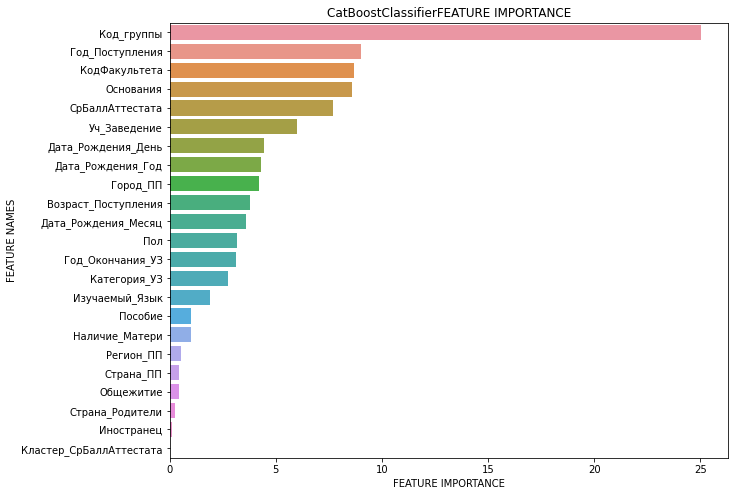

In [115]:
plot_feature_importance(model.get_feature_importance(), features.columns, 'CatBoostClassifier')

In [ ]:
# encoder_ordinal = OrdinalEncoder()
# features[columns_for_encoder] = encoder_ordinal.fit_transform(features[columns_for_encoder]).astype('int')
# features.head(3) # Проверим

In [ ]:
# features = features.fillna(-1)

In [ ]:
# importances = mutual_info_classif(features, target, random_state=RANDOM_SEED)

# feature_importances = pd.Series(importances, features.columns[0:len(features.columns)])
# feature_importances = feature_importances.sort_values()

# plt.figure(figsize=(10,10))
# feature_importances.plot(kind='barh')
# plt.show()

Тестирование модели

In [116]:
features_test = test.drop(['Статус', 
                           'Дата_Рождения',
                           'Где_Находится_УЗ',
                           'ID',
                           'Опекунство',
                           'Село',
                           'Наличие_Отца'
                          ],
                          axis=1)

In [117]:
features_test[columns_for_encoder] = features_test[columns_for_encoder].fillna('неизвестно')

In [118]:
pred = model.predict(features_test)

Запись результата

In [119]:
test["Статус"] = pred

In [120]:
df_submission = test[['ID', 'Статус']]

In [121]:
df_submission.to_csv("submission_2.csv", index=False)